# Background

In this homework we will be exploring interactive visualization, which is a key ingredient of many successful data visualizations (especially when it comes to infographics).

Unemployment rates are major economic metrics and a matter of concern for governments around the world. Though its definition may seem straightforward at first glance (usually defined as the number of unemployed people divided by the active population), it can be tricky to define consistently. For example, one must define what exactly unemployed means : looking for a job ? Having declared their unemployment ? Currently without a job ? Should students or recent graduates be included ? We could also wonder what the active population is : everyone in an age category (e.g. 16-64) ? Anyone interested by finding a job ? Though these questions may seem subtle, they can have a large impact on the interpretation of the results : 3% unemployment doesn't mean much if we don't know who is included in this percentage.

In this homework you will be dealing with two different datasets from the statistics offices of the European commission (eurostat) and the Swiss Confederation (amstat). They provide a variety of datasets with plenty of information on many different statistics and demographics at their respective scales. Unfortunately, as is often the case is data analysis, these websites are not always straightforward to navigate. They may include a lot of obscure categories, not always be translated into your native language, have strange link structures, … Navigating this complexity is part of a data scientists' job : you will have to use a few tricks to get the right data for this homework.

For the visualization part, install Folium (HINT: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!). Folium's README comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find two .topojson files, containing the geo-coordinates of

European countries (liberal definition of EU) (topojson/europe.topojson.json, source)
Swiss cantons (topojson/ch-cantons.topojson.json)
These will be used as an overlay on the Folium maps.

# Assignment

In [1]:
import os
import pandas as pd
import json
import folium
import numpy as np
import matplotlib.pyplot as plt

    1. Go to the eurostat website and try to find a dataset that includes the european unemployment rates at a recent date.
    
    Use this data to build a Choropleth map which shows the unemployment rate in Europe at a country level. 
    Think about the colors you use,  how you decided to split the intervals into data classes or which interactions you 
    could add in order to make the visualization  intuitive and expressive. Compare Switzerland's unemployment rate to 
    that of the rest of Europe.

In [2]:
unemployment_rate_file = r'tsdec450.tsv'
unemployment_rate_file = r'tepsr_wc170.tsv'

unemployment_rate_data = pd.read_csv(unemployment_rate_file, delimiter='\t|,')
unemployment_rate_data.head()

/Users/Khalil/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


,unit,sex,age,isced11,geo\time,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,PC,T,Y15-24,TOTAL,AT,11.0 b,9.8,9.4 b,8.5,10.7,9.5,8.9,9.4,9.7,10.3,10.6,11.2
1,PC,T,Y15-24,TOTAL,BE,21.5 b,20.5,18.8,18.0,21.9,22.4,18.7 b,19.8,23.7,23.2,22.1,20.1
2,PC,T,Y15-24,TOTAL,BG,22.3 b,19.5,15.1,12.7 b,16.2,21.9 b,25.0 b,28.1,28.4,23.8,21.6,17.2
3,PC,T,Y15-24,TOTAL,CH,8.8 b,7.7,7.1,7.0,8.5,8.2 b,7.7,8.3,8.7,8.6,8.8,8.6
4,PC,T,Y15-24,TOTAL,CY,13.9 b,10.0,10.2,9.0,13.8 b,16.6,22.4,27.7,38.9,36.0,32.8,29.1


In [3]:
np.unique(unemployment_rate_data['age'])

array(['Y15-24', 'Y15-74', 'Y20-64', 'Y25-29', 'Y25-54', 'Y55-64'], dtype=object)

In [4]:
unemployment_rate_df = unemployment_rate_data.loc[unemployment_rate_data['unit']=='PC_POP'][['geo\\time', '2016']]
unemployment_rate_df = unemployment_rate_data.loc[unemployment_rate_data['age']=='Y15-74'][['geo\\time', '2016']]
unemployment_rate_df.head()

,geo\time,2016
37,AT,6.0
38,BE,7.8
39,BG,7.6
40,CH,5.0
41,CY,13.0


In [5]:
def to_num(s):
    s = ''.join(ch for ch in s if ch.isdigit() or ch=='.')
    return pd.to_numeric(s)
    
unemployment_rate_df['2016'] = unemployment_rate_df['2016'].apply(to_num)

In [7]:
# import json
europe_geo_path = r'./topojson/europe.topojson.json'
json_file = json.loads(open(europe_geo_path).read())

In [8]:
europe_codes = np.asarray(unemployment_rate_df['geo\\time'])

json_objects = json_file['objects']['europe']['geometries']
countries = []
codes = []
for i in json_objects:
    codes.append(i['id'])
    countries.append(i['properties']['NAME'])
for code in europe_codes:
    if code not in codes:
        print(code)

#EL corresponds to Greece (GR), and UK to United Kingdom (GB)

EA18
EA19
EL
EU27
EU28
UK


In [9]:
# Update Greece and UK code
unemployment_rate_df = unemployment_rate_df.replace('EL', 'GR')
unemployment_rate_df = unemployment_rate_df.replace('UK', 'GB')

### Choose data classes

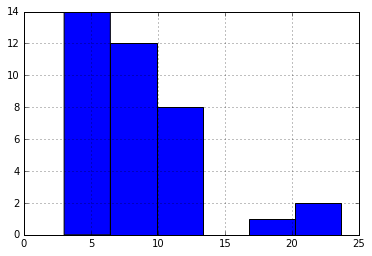

In [10]:
unemployment_rate_df['2016'].hist(bins=6, edgecolor='black')
plt.show()

In [11]:
europe_map = folium.Map(location=[47.22, 11.56], zoom_start=4)
europe_map.choropleth(geo_data=json_file,topojson='objects.europe', data=unemployment_rate_df,
             columns=['geo\\time', '2016'],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2, line_weight=4,
             legend_name='Unemployment rate in Europe', ) #threshold_scale=perc

europe_map

In [12]:
unemployment_rate_df[ unemployment_rate_df['geo\\time']=='CH']

,geo\time,2016
40,CH,5.0


In [13]:
def color(labels, s, color1='b', color2='r'):
    colors = []
    for l in labels:
        if l == s:
            colors.append(color2)
        else:
            colors.append(color1)
    return colors

geo_time = list(unemployment_rate_df['geo\\time'])
del_idx = [i for i in range(len(geo_time)) if geo_time[i] not in codes]
geo_time = np.delete(geo_time, del_idx)
rates = np.delete(list(unemployment_rate_df['2016']), del_idx)
sorted_idx = np.argsort(rates)

x = geo_time[sorted_idx]
rates = rates[sorted_idx]
labels = [countries[codes.index(i)] for i in x]



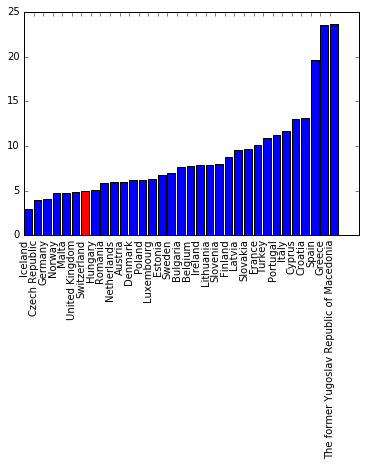

In [14]:
idx = np.arange(len(x))
plt.bar(idx, rates, color=color(labels, 'Switzerland'))
plt.xticks(idx, labels, rotation='vertical')
plt.show()

    2. Go to the amstat website to find a dataset that includes the unemployment rates in Switzerland at a recent date.
    
    HINT Go to the details tab to find the raw data you need. If you do not speak French, German or Italian, think of using free translation services to navigate your way through.
    Use this data to build another Choropleth map, this time showing the unemployment rate at the level of swiss cantons. Again, try to make the map as expressive as possible, and comment on the trends you observe.
    
    The Swiss Confederation defines the rates you have just plotted as the number of people looking for a job divided by the size of the active population (scaled by 100). This is surely a valid choice, but as we discussed one could argue for a different categorization.
    
    Copy the map you have just created, but this time don't count in your statistics people who already have a job and are looking for a new one. How do your observations change ? You can repeat this with different choices of categories to see how selecting different metrics can lead to different interpretations of the same data.

In [15]:
ch_unemployment_rate_file = r'2_1 Taux de chômage.csv'

ch_unemployment_rate_data = pd.read_csv(ch_unemployment_rate_file, delimiter='\t|,')
ch_unemployment_rate_data.head()

/Users/Khalil/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


,"��"" C a n t o n "" "," "" M o i s "" "," "" J a n v i e r   2 0 1 6 "" "," "" J a n v i e r   2 0 1 6 "" .1"," "" F � v r i e r   2 0 1 6 "" "," "" F � v r i e r   2 0 1 6 "" .1"," "" M a r s   2 0 1 6 "" "," "" M a r s   2 0 1 6 "" .1"," "" A v r i l   2 0 1 6 "" "," "" A v r i l   2 0 1 6 "" .1",...," "" S e p t e m b r e   2 0 1 6 "" "," "" S e p t e m b r e   2 0 1 6 "" .1"," "" O c t o b r e   2 0 1 6 "" "," "" O c t o b r e   2 0 1 6 "" .1"," "" N o v e m b r e   2 0 1 6 "" "," "" N o v e m b r e   2 0 1 6 "" .1"," "" D � c e m b r e   2 0 1 6 "" "," "" D � c e m b r e   2 0 1 6 "" .1"," "" T o t a l "" "," "" T o t a l "" .1"
0, ,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,   ," "" M e s u r e s "" "," "" T a u x   d e   c h � m a g e "" "," "" C h � m e u r s   i n s c r i t s "" "," "" T a u x   d e   c h � m a g e "" "," "" C h � m e u r s   i n s c r i t s "" "," "" T a u x   d e   c h � m a g e "" "," "" C h � m e u r s   i n s c r i t s "" "," "" T a u x   d e   c h � m a g e "" "," "" C h � m e u r s   i n s c r i t s "" ",...," "" T a u x   d e   c h � m a g e "" "," "" C h � m e u r s   i n s c r i t s "" "," "" T a u x   d e   c h � m a g e "" "," "" C h � m e u r s   i n s c r i t s "" "," "" T a u x   d e   c h � m a g e "" "," "" C h � m e u r s   i n s c r i t s "" "," "" T a u x   d e   c h � m a g e "" "," "" C h � m e u r s   i n s c r i t s "" "," "" T a u x   d e   c h � m a g e "" "," "" C h � m e u r s   i n s c r i t s "" "
2, ,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3," "" Z u r i c h "" ", ," "" 3 . 8 "" "," "" 3 1 ' 3 3 1 "" "," "" 3 . 8 "" "," "" 3 1 ' 5 0 2 "" "," "" 3 . 8 "" "," "" 3 0 ' 8 2 0 "" "," "" 3 . 6 "" "," "" 2 9 ' 8 7 6 "" ",...," "" 3 . 6 "" "," "" 2 9 ' 4 6 2 "" "," "" 3 . 6 "" "," "" 2 9 ' 7 6 8 "" "," "" 3 . 7 "" "," "" 3 0 ' 6 5 1 "" "," "" 3 . 8 "" "," "" 3 1 ' 5 7 0 "" "," "" 3 . 7 "" "," "" 3 6 1 ' 0 0 7 "" "
4, ,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [16]:
extra_col=['aa']
a = ['Canton', 'Total']
[a.append(i) for i in extra_col]
a

['Canton', 'Total', 'aa']

In [17]:
def extract_info(ch_unemployment_rate_data, nationality=False):
    ch_columns = ch_unemployment_rate_data.columns
    if nationality:
        ch_unemployment_rate_df = ch_unemployment_rate_data[[ch_columns[0], ch_columns[1], ch_columns[-2]]]
        ch_unemployment_rate_df = ch_unemployment_rate_df[ch_unemployment_rate_df[ch_columns[0]]!='\x00'].drop(1)
        ch_unemployment_rate_df.columns = ['Canton', 'nationalité', 'Total']
        ch_unemployment_rate_df['nationalité'] = ch_unemployment_rate_df['nationalité'].apply(lambda x: x.replace('"','').replace('\x00',''))
    else:
        ch_unemployment_rate_df = ch_unemployment_rate_data[[ch_columns[0], ch_columns[-2]]]
        ch_unemployment_rate_df = ch_unemployment_rate_df[ch_unemployment_rate_df[ch_columns[0]]!='\x00'].drop(1)
        ch_unemployment_rate_df.columns = ['Canton', 'Total']
    
    ch_unemployment_rate_df['Total'] = ch_unemployment_rate_df['Total'].apply(to_num)
    ch_unemployment_rate_df['Canton'] = ch_unemployment_rate_df['Canton'].apply(lambda x: x.replace('"','').replace('\x00',''))
    ch_unemployment_rate_df.drop(ch_unemployment_rate_df.tail(1).index,inplace=True)
    return ch_unemployment_rate_df

ch_unemployment_rate_df = extract_info(ch_unemployment_rate_data)
ch_unemployment_rate_df.head()

,Canton,Total
3,Zurich,3.7
5,Berne,2.7
7,Lucerne,2.1
9,Uri,1.0
11,Schwyz,1.8


In [18]:
# import swiss json
ch_geo_path = r'./topojson/ch-cantons.topojson.json'
ch_json_file = json.loads(open(ch_geo_path).read())

In [19]:
json_objects = ch_json_file['objects']['cantons']['geometries']
cantons = []
codes = []
for i in json_objects:
    codes.append(i['id'])
    cantons.append(i['properties']['name'])
len(codes), len(cantons), np.asarray(cantons)

(26, 26, array(['Zürich', 'Bern/Berne', 'Luzern', 'Uri', 'Schwyz', 'Obwalden',
        'Nidwalden', 'Glarus', 'Zug', 'Fribourg', 'Solothurn',
        'Basel-Stadt', 'Basel-Landschaft', 'Schaffhausen',
        'Appenzell Ausserrhoden', 'Appenzell Innerrhoden', 'St. Gallen',
        'Graubünden/Grigioni', 'Aargau', 'Thurgau', 'Ticino', 'Vaud',
        'Valais/Wallis', 'Neuchâtel', 'Genève', 'Jura'],
       dtype='<U22'))

In [20]:
ch_unemployment_rate_df['Canton_json']=cantons
ch_unemployment_rate_df['Code']=codes

In [21]:
ch_unemployment_rate_df[['Code', 'Total']]

,Code,Total
3,ZH,3.7
5,BE,2.7
7,LU,2.1
9,UR,1.0
11,SZ,1.8
13,OW,1.0
15,NW,1.1
17,GL,2.4
19,ZG,2.4
21,FR,2.8


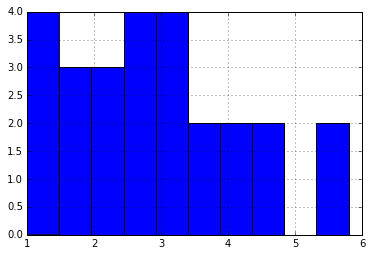

(None, 1.0)

In [22]:
ch_unemployment_rate_df['Total'].hist(edgecolor='black')
plt.show(), min(ch_unemployment_rate_df['Total'])

In [23]:
swiss_map = folium.Map(location=[46.82, 8.228], zoom_start=8)
swiss_map.choropleth(geo_data=ch_json_file, topojson='objects.cantons', data=ch_unemployment_rate_df,
             columns=['Code', 'Total'],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2, line_weight=2,
             legend_name='Unemployment rate in Switzerland', threshold_scale=[1,2,3,4,5,6]) #threshold_scale=perc

swiss_map

3- Use the amstat website again to find a dataset that includes the unemployment rates in Switzerland at recent date, this time making a distinction between Swiss and foreign workers.

The Economic Secretary (SECO) releases a monthly report on the state of the employment market. In the latest report (September 2017), it is noted that there is a discrepancy between the unemployment rates for foreign (5.1%) and Swiss (2.2%) workers.

Show the difference in unemployment rates between the two categories in each canton on a Choropleth map (hint The easy way is to show two separate maps, but can you think of something better ?). Where are the differences most visible ? Why do you think that is ?

Now let's refine the analysis by adding the differences between age groups. As you may have guessed it is nearly impossible to plot so many variables on a map. Make a bar plot, which is a better suited visualization tool for this type of multivariate data.

In [24]:
ch_unemployment_rate_file_et = r'2_1 Taux de chômage etrangers.csv'

ch_unemployment_rate_data_et = pd.read_csv(ch_unemployment_rate_file_et, delimiter='\t|,')
ch_unemployment_rate_df_et = extract_info(ch_unemployment_rate_data_et, nationality=True)
ch_unemployment_rate_df_et.head()

/Users/Khalil/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


,Canton,nationalité,Total
3,Zurich,Etrangers,6.0
5,Zurich,Suisses,2.8
7,Berne,Etrangers,6.5
9,Berne,Suisses,2.0
11,Lucerne,Etrangers,4.7


In [25]:
df_suisse = ch_unemployment_rate_df_et[ ch_unemployment_rate_df_et['nationalité']=='Suisses'][['Canton', 'Total']]
df_etrangers = ch_unemployment_rate_df_et[ ch_unemployment_rate_df_et['nationalité']=='Etrangers'][['Canton', 'Total']]

df_suisse['Canton_json']=cantons
df_suisse['Code']=codes
df_etrangers['Canton_json']=cantons
df_etrangers['Code']=codes
df_suisse.head()

,Canton,Total,Canton_json,Code
5,Zurich,2.8,Zürich,ZH
9,Berne,2.0,Bern/Berne,BE
13,Lucerne,1.5,Luzern,LU
17,Uri,0.6,Uri,UR
21,Schwyz,1.2,Schwyz,SZ


In [26]:
df_etrangers.head()

,Canton,Total,Canton_json,Code
3,Zurich,6.0,Zürich,ZH
7,Berne,6.5,Bern/Berne,BE
11,Lucerne,4.7,Luzern,LU
15,Uri,4.2,Uri,UR
19,Schwyz,3.9,Schwyz,SZ


In [27]:
swiss_map = folium.Map(location=[46.82, 8.228], zoom_start=8)
swiss_map.choropleth(geo_data=ch_json_file, topojson='objects.cantons', data=df_suisse,
             columns=['Code', 'Total'],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2, line_weight=2,
             legend_name='Unemployment rate in Switzerland (Swiss)',) #threshold_scale=perc

swiss_map

In [28]:
swiss_map = folium.Map(location=[46.82, 8.228], zoom_start=8)
swiss_map.choropleth(geo_data=ch_json_file, topojson='objects.cantons', data=df_etrangers,
             columns=['Code', 'Total'],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2, line_weight=2,
             legend_name='Unemployment rate in Switzerland (Foreign)', ) #threshold_scale=perc

swiss_map

# In the Same map

In [29]:
from folium import plugins


In [30]:
swiss_map = folium.Map(location=[46.82, 8.228], zoom_start=8)
swiss_map.choropleth(geo_data=ch_json_file, topojson='objects.cantons', data=df_suisse,
             columns=['Code', 'Total'],
                     name='Swiss',
             key_on='feature.id',
             fill_color='PuRd', fill_opacity=0.5, line_opacity=0.2, line_weight=2,
             legend_name='Unemployment rate in Switzerland (Swiss)',) #threshold_scale=perc

swiss_map.choropleth(geo_data=ch_json_file, topojson='objects.cantons', data=df_etrangers,
             columns=['Code', 'Total'],
                     name='Foreign',
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.2, line_weight=2,
             legend_name='Unemployment rate in Switzerland (Foreign)', ) #threshold_scale=perc
             
folium.LayerControl().add_to(swiss_map)
swiss_map

In [45]:
df_suisse

,Canton,Total,Canton_json,Code
5,Zurich,2.8,ZÃ¼rich,ZH
9,Berne,2.0,Bern/Berne,BE
13,Lucerne,1.5,Luzern,LU
17,Uri,0.6,Uri,UR
21,Schwyz,1.2,Schwyz,SZ
25,Obwald,0.7,Obwalden,OW
29,Nidwald,0.8,Nidwalden,NW
33,Glaris,1.6,Glarus,GL
37,Zoug,1.8,Zug,ZG
41,Fribourg,1.9,Fribourg,FR


In [46]:
df_etrangers

,Canton,Total,Canton_json,Code
3,Zurich,6.0,ZÃ¼rich,ZH
7,Berne,6.5,Bern/Berne,BE
11,Lucerne,4.7,Luzern,LU
15,Uri,4.2,Uri,UR
19,Schwyz,3.9,Schwyz,SZ
23,Obwald,3.0,Obwalden,OW
27,Nidwald,3.1,Nidwalden,NW
31,Glaris,4.9,Glarus,GL
35,Zoug,4.0,Zug,ZG
39,Fribourg,5.8,Fribourg,FR


In [67]:
df_taux = df_suisse[['Canton']]
df_taux['Suisses'] = list(df_suisse['Total'])
df_taux['Etrangers'] = list(df_etrangers['Total'])

C:\Users\omari\Miniconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\omari\Miniconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


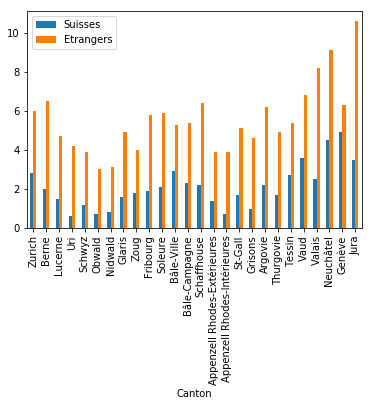

In [74]:
df_taux.plot.bar(x='Canton')
plt.show()